In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Crop Yield

In [2]:
Crops_Yield = pd.read_csv("Production_Crops_Livestock_E_All_Data_(Normalized).csv", encoding="ISO-8859-1")

Crops_Yield.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1975,1975,ha,0.0,E
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1976,1976,ha,5900.0,E
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1977,1977,ha,6000.0,E
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1978,1978,ha,6000.0,E
4,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1979,1979,ha,6000.0,E


In [3]:
Crops_Yield.shape

(3761168, 13)

In [4]:
Crops_Yield.nunique()

Area Code             245
Area Code (M49)       245
Area                  245
Item Code             301
Item Code (CPC)       301
Item                  301
Element Code           18
Element                 9
Year Code              61
Year                   61
Unit                   12
Value              941901
Flag                    5
dtype: int64

In [5]:
missing_values = Crops_Yield.isnull().sum()
missing_values

Area Code          0
Area Code (M49)    0
Area               0
Item Code          0
Item Code (CPC)    0
Item               0
Element Code       0
Element            0
Year Code          0
Year               0
Unit               0
Value              0
Flag               0
dtype: int64

In [6]:
Crops_Yield.drop(columns=['Area Code (M49)', 'Item Code (CPC)'], inplace=True)

In [7]:
filtered_Crops_Yield = Crops_Yield[(Crops_Yield['Element']=='Yield') & (Crops_Yield['Unit']=='hg/ha')]

In [8]:
filtered_Crops_Yield.shape

(761663, 11)

In [9]:
# Define the top10_items list again
top10_items = [
    "Cassava", "Maize", "Plantains", "Potatoes", "Rice", 
    "Sorghum", "Soya beans", "Sweet potatoes", "Wheat", "Yams"
]

# Dictionary to store related sub-categories for each item in the top10_items list
related_items_dict = {}

# Find related sub-categories for each item
for item in top10_items:
    related_subcategories = filtered_Crops_Yield[filtered_Crops_Yield['Item'].str.contains(item, case=False)]['Item'].unique()
    related_items_dict[item] = related_subcategories

related_items_dict

{'Cassava': array(['Cassava, fresh', 'Cassava leaves'], dtype=object),
 'Maize': array(['Maize (corn)', 'Green corn (maize)'], dtype=object),
 'Plantains': array(['Plantains and cooking bananas'], dtype=object),
 'Potatoes': array(['Potatoes', 'Sweet potatoes'], dtype=object),
 'Rice': array(['Rice'], dtype=object),
 'Sorghum': array(['Sorghum'], dtype=object),
 'Soya beans': array(['Soya beans'], dtype=object),
 'Sweet potatoes': array(['Sweet potatoes'], dtype=object),
 'Wheat': array(['Wheat', 'Buckwheat'], dtype=object),
 'Yams': array(['Yams'], dtype=object)}

In [10]:
# Create a copy of the data
filtered_Crops_Yield_copy = filtered_Crops_Yield.copy()

# Update the mapping based on user input
adjusted_unify_mapping = {
    'Cassava, fresh': 'Cassava',
    'Cassava leaves': 'Cassava',
    'Maize (corn)': 'Maize',
    'Green corn (maize)': 'Maize',
    'Plantains and cooking bananas': 'Plantains',
}

# Replace the items using the adjusted unify mapping on the copy
filtered_Crops_Yield_copy['Adjusted Unified Item'] = filtered_Crops_Yield_copy['Item'].replace(adjusted_unify_mapping)

# Filter the data to only include items from top10_items and their related subcategories
filtered_10 = filtered_Crops_Yield_copy[filtered_Crops_Yield_copy['Adjusted Unified Item'].isin(top10_items) | filtered_Crops_Yield_copy['Item'].isin(top10_items)]

# Group by the "Adjusted Unified Item" column and sum the values, then sort the results to get the top 10 yields
top_10_from_filtered_10 = filtered_10.groupby('Adjusted Unified Item').agg({'Value': 'sum'}).sort_values(by='Value', ascending=False).head(10)

top_10_from_filtered_10

,Value
Adjusted Unified Item,
Potatoes,1.654587e+09
Sweet potatoes,7.882906e+08
Cassava,7.278692e+08
Maize,6.579826e+08
Yams,4.080971e+08
Plantains,3.611542e+08
Rice,2.867946e+08
Wheat,2.139724e+08
Sorghum,1.442764e+08


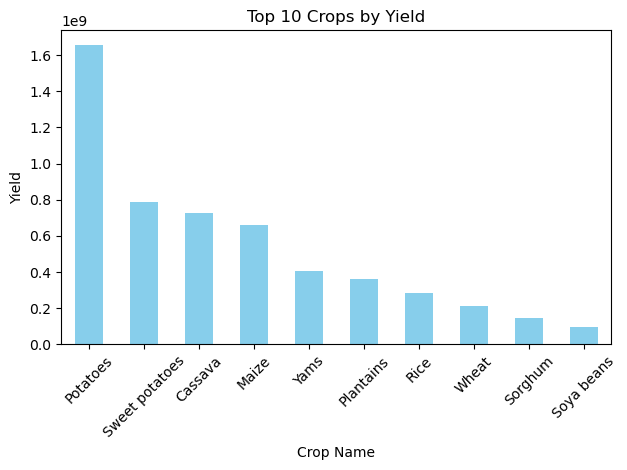

In [11]:
# Plotting the vertical bar chart
top_10_from_filtered_10.sort_values(by='Value', ascending=False).plot(kind='bar', legend=False, ax=plt.gca(), color='skyblue', rot=45)
plt.title('Top 10 Crops by Yield')
plt.ylabel('Yield')
plt.xlabel('Crop Name')
plt.tight_layout()
plt.show()

In [12]:
# Filter the data to only include the top 10 crops
filtered_data_top_10 = filtered_10[filtered_10['Adjusted Unified Item'].isin(top_10_from_filtered_10.index)]

# Replace the original 'Item' column values with the 'Adjusted Unified Item' values
filtered_data_top_10['Item'] = filtered_data_top_10['Adjusted Unified Item']

# Display the first few rows of the filtered data
filtered_data_top_10.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Adjusted Unified Item
3127,2,Afghanistan,56,Maize,5419,Yield,1961,1961,hg/ha,14000.0,E,Maize
3128,2,Afghanistan,56,Maize,5419,Yield,1962,1962,hg/ha,14000.0,E,Maize
3129,2,Afghanistan,56,Maize,5419,Yield,1963,1963,hg/ha,14260.0,E,Maize
3130,2,Afghanistan,56,Maize,5419,Yield,1964,1964,hg/ha,14257.0,E,Maize
3131,2,Afghanistan,56,Maize,5419,Yield,1965,1965,hg/ha,14400.0,E,Maize


In [13]:
filtered_data_top_10.nunique()

Area Code                  240
Area                       240
Item Code                   12
Item                        10
Element Code                 1
Element                      1
Year Code                   61
Year                        61
Unit                         1
Value                    51511
Flag                         4
Adjusted Unified Item       10
dtype: int64

In [14]:
filtered_data_top_10.shape

(81628, 12)

# Emission

In [15]:
emission_data = pd.read_csv('World Data Bank_Country_Climate_and_Development_Report_(CCDR)_Full Set.xlsx - Data.csv')
emission_data['Series Name'].nunique()

124

In [16]:
# Melt the dataframe to transform year columns into a single column
melted_emission_data = emission_data.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
                        value_vars=[col for col in emission_data.columns if 'YR' in col], 
                        var_name='Year', 
                        value_name='Value')
melted_emission_data['Year'] = melted_emission_data['Year'].str.extract('(\d+)').astype(int)
melted_emission_data['Value'] = pd.to_numeric(melted_emission_data['Value'], errors='coerce')

# Define categories and their related series names based on earlier discussion and selections
categories = {
    'N2O': [
        'Emission Totals - Direct emissions (N2O) - AFOLU',
        'Emission Totals - Direct emissions (N2O) - Crop Residues',
        'Emission Totals - Direct emissions (N2O) - Farm-gate emissions',
        'Emission Totals - Direct emissions (N2O) - Manure applied to Soils',
        'Emission Totals - Direct emissions (N2O) - Synthetic Fertilizers',
        'Emission Totals - Emissions (N2O) - AFOLU',
        'Emission Totals - Emissions (N2O) - Burning - Crop residues',
        'Emission Totals - Emissions (N2O) - Drained organic soils (N2O)',
        'Emission Totals - Emissions (N2O) - Farm-gate emissions',
        'Emission Totals - Emissions (N2O) - Forest fires',
        'Emission Totals - Emissions (N2O) - Land Use change',
        'Emission Totals - Emissions (N2O) - Manure applied to Soils',
        'Emission Totals - Emissions (N2O) - Manure Management',
        'Emission Totals - Emissions (N2O) - Savanna fires',
        'Emission Totals - Direct emissions (N2O) - Agricultural Soils',
        'Emission Totals - Direct emissions (N2O) - Emissions on agricultural land',
        'Emission Totals - Direct emissions (N2O) - IPCC Agriculture',
        'Emission Totals - Direct emissions (N2O) - Manure left on Pasture',
        'Emission Totals - Emissions (N2O) - Agricultural Soils',
        'Emission Totals - Emissions (N2O) - Crop Residues',
        'Emission Totals - Emissions (N2O) - Emissions on agricultural land',
        'Emission Totals - Emissions (N2O) - Fires in humid tropical forests',
        'Emission Totals - Emissions (N2O) - IPCC Agriculture',
        'Emission Totals - Emissions (N2O) - LULUCF',
        'Emission Totals - Emissions (N2O) - Manure left on Pasture',
        'Emission Totals - Emissions (N2O) - On-farm energy use',
        'Emission Totals - Emissions (N2O) - Synthetic Fertilizers'
    ],
    'CO2': [
        'Emission Totals - Emissions (CO2) - AFOLU',
        'Emission Totals - Emissions (CO2) - Emissions on agricultural land',
        'Emission Totals - Emissions (CO2) - Fires in organic soils',
        'Emission Totals - Emissions (CO2) - Land Use change',
        'Emission Totals - Emissions (CO2) - Net Forest conversion',
        'Emission Totals - Emissions (CO2) - Drained organic soils (CO2)',
        'Emission Totals - Emissions (CO2) - Farm-gate emissions',
        'Emission Totals - Emissions (CO2) - Forestland',
        'Emission Totals - Emissions (CO2) - LULUCF',
        'Emission Totals - Emissions (CO2) - On-farm energy use'
    ],
    'CO2eq': [
        'Emission Totals - Emissions (CO2eq) (AR5) - AFOLU',
        'Emission Totals - Emissions (CO2eq) (AR5) - Burning - Crop residues',
        'Emission Totals - Emissions (CO2eq) (AR5) - Drained organic soils',
        'Emission Totals - Emissions (CO2eq) (AR5) - Drained organic soils (N2O)',
        'Emission Totals - Emissions (CO2eq) (AR5) - Enteric Fermentation',
        'Emission Totals - Emissions (CO2eq) (AR5) - Fires in humid tropical forests',
        'Emission Totals - Emissions (CO2eq) (AR5) - Forest fires',
        'Emission Totals - Emissions (CO2eq) (AR5) - IPCC Agriculture',
        'Emission Totals - Emissions (CO2eq) (AR5) - LULUCF',
        'Emission Totals - Emissions (CO2eq) (AR5) - Manure left on Pasture',
        'Emission Totals - Emissions (CO2eq) (AR5) - Net Forest conversion',
        'Emission Totals - Emissions (CO2eq) (AR5) - Rice Cultivation',
        'Emission Totals - Emissions (CO2eq) (AR5) - Synthetic Fertilizers',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - Burning - Crop residues',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - Enteric Fermentation',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - Fires in humid tropical forests',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - Forest fires',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - Land Use change',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - Manure Management',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - Rice Cultivation',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - AFOLU',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - Burning - Crop residues',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - Drained organic soils (N2O)',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - Farm-gate emissions',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - Forest fires',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - Land Use change',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - Manure applied to Soils',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - Manure Management',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - Savanna fires',
        'Emission Totals - Emissions (CO2eq) (AR5) - Agricultural Soils',
        'Emission Totals - Emissions (CO2eq) (AR5) - Crop Residues',
        'Emission Totals - Emissions (CO2eq) (AR5) - Drained organic soils (CO2)',
        'Emission Totals - Emissions (CO2eq) (AR5) - Emissions on agricultural land',
        'Emission Totals - Emissions (CO2eq) (AR5) - Farm-gate emissions',
        'Emission Totals - Emissions (CO2eq) (AR5) - Fires in organic soils',
        'Emission Totals - Emissions (CO2eq) (AR5) - Forestland',
        'Emission Totals - Emissions (CO2eq) (AR5) - Land Use change',
        'Emission Totals - Emissions (CO2eq) (AR5) - Manure applied to Soils',
        'Emission Totals - Emissions (CO2eq) (AR5) - Manure Management',
        'Emission Totals - Emissions (CO2eq) (AR5) - On-farm energy use',
        'Emission Totals - Emissions (CO2eq) (AR5) - Savanna fires',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - AFOLU',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - Emissions on agricultural land',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - Farm-gate emissions',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - Fires in organic soils',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - IPCC Agriculture',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - LULUCF',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - On-farm energy use',
        'Emission Totals - Emissions (CO2eq) from CH4 (AR5) - Savanna fires',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - Agricultural Soils',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - Crop Residues',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - Emissions on agricultural land',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - Fires in humid tropical forests',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - IPCC Agriculture',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - LULUCF',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - Manure left on Pasture',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - On-farm energy use',
        'Emission Totals - Emissions (CO2eq) from N2O (AR5) - Synthetic Fertilizers',
    ],
    'CH4': [
        'Emission Totals - Emissions (CH4) - Burning - Crop residues',
        'Emission Totals - Emissions (CH4) - Enteric Fermentation',
        'Emission Totals - Emissions (CH4) - Fires in humid tropical forests',
        'Emission Totals - Emissions (CH4) - Forest fires',
        'Emission Totals - Emissions (CH4) - Land Use change',
        'Emission Totals - Emissions (CH4) - Manure Management',
        'Emission Totals - Emissions (CH4) - Rice Cultivation',
        'Emission Totals - Emissions (CH4) - AFOLU',
        'Emission Totals - Emissions (CH4) - Emissions on agricultural land',
        'Emission Totals - Emissions (CH4) - Farm-gate emissions',
        'Emission Totals - Emissions (CH4) - Fires in organic soils',
        'Emission Totals - Emissions (CH4) - IPCC Agriculture',
        'Emission Totals - Emissions (CH4) - LULUCF',
        'Emission Totals - Emissions (CH4) - On-farm energy use',
        'Emission Totals - Emissions (CH4) - Savanna fires'
    ],
    'Total GHG': [
        'Total GHG emissions by sector (Mt CO2 eq) - Electricity/Heat',
        'Total GHG emissions by sector (Mt CO2 eq) - Fugitive Emissions',
        'Total GHG emissions by sector (Mt CO2 eq) - Building',
        'Total GHG emissions by sector (Mt CO2 eq) - Land-Use Change and Forestry',
        'Total GHG emissions by sector (Mt CO2 eq) - Other Fuel Combustion',
        'Total GHG emissions by sector (Mt CO2 eq) - Total including LUCF',
        'Total GHG emissions by sector (Mt CO2 eq) - Waste',
        'Total GHG emissions by sector (Mt CO2 eq) - Agriculture',
        'Total GHG emissions by sector (Mt CO2 eq) - Bunker Fuels',
        'Total GHG emissions by sector (Mt CO2 eq) - Energy',
        'Total GHG emissions by sector (Mt CO2 eq) - Industrial Processes',
        'Total GHG emissions by sector (Mt CO2 eq) - Manufacturing/Construction',
        'Total GHG emissions by sector (Mt CO2 eq) - Total excluding LUCF',
        'Total GHG emissions by sector (Mt CO2 eq) - Transportation'
    ]
}

# Filter data based on the defined categories
filtered_emission_data = melted_emission_data[melted_emission_data['Series Name'].isin(sum(categories.values(), []))]

# Group by Country, Year, and Category to get the sum
grouped_emission_data = filtered_emission_data.groupby(['Country Name', 'Year', 'Series Name'])['Value'].sum().reset_index()

# Map the series names to their categories
grouped_emission_data['Category'] = grouped_emission_data['Series Name'].map({series: cat for cat, series_list in categories.items() for series in series_list})

# Sum values based on the new categories
result = grouped_emission_data.groupby(['Country Name', 'Year', 'Category'])['Value'].sum().reset_index()

# Pivot the result dataframe to transform the 'Category' column into separate columns
pivoted_result = result.pivot_table(index=['Country Name', 'Year'], columns='Category', values='Value').reset_index()

# Merge the pivoted result with the original data to get the 'Country Code' column
final_emission = pivoted_result.merge(emission_data[['Country Code', 'Country Name']].drop_duplicates(), on='Country Name', how='left')

final_emission.head()

,Country Name,Year,CH4,CO2,CO2eq,N2O,Total GHG,Country Code
0,Afghanistan,1960,0.0000,0.0,0.0000,0.0000,0.0,AFG
1,Afghanistan,1961,571.5586,0.0,48431.2070,52.8622,0.0,AFG
2,Afghanistan,1962,581.7342,0.0,48835.3262,52.3507,0.0,AFG
3,Afghanistan,1963,604.0564,0.0,50362.7412,53.2348,0.0,AFG
4,Afghanistan,1964,613.8140,0.0,51256.1374,54.3674,0.0,AFG


In [17]:
final_emission.nunique()

Country Name      220
Year               61
CH4             10649
CO2              6074
CO2eq           11017
N2O             10315
Total GHG        5062
Country Code      220
dtype: int64

In [18]:
final_emission.isnull().sum()

Country Name    0
Year            0
CH4             0
CO2             0
CO2eq           0
N2O             0
Total GHG       0
Country Code    0
dtype: int64

In [19]:
final_emission.to_csv("final_emission.csv", index=False)

### Merge Crops Yield and Emission files

In [20]:
# 1. Create and apply a mapping for country names
# This mapping helps to align country names in both datasets
country_mapping = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'China, Hong Kong SAR': 'Hong Kong SAR, China',
    'China, Taiwan Province of': 'Taiwan, China',
    'Congo': 'Congo, Rep.',
    'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
    "Côte d'Ivoire": "Cote d'Ivoire",
    "Democratic People's Republic of Korea": "Korea, Dem. People's Rep.",
    'Egypt': 'Egypt, Arab Rep.',
    'Gambia': 'Gambia, The',
    'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    "Lao People's Democratic Republic": 'Lao PDR',
    'Republic of Korea': 'Korea, Rep.',
    'Republic of Moldova': 'Moldova',
    'Slovakia': 'Slovak Republic',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'United States',
    'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
    'Viet Nam': 'Vietnam',
    'Yemen': 'Yemen, Rep.',
    'Bahamas': 'Bahamas, The',
    'Czechia': 'Czech Republic',
    'Palestine': 'West Bank and Gaza',
    'Türkiye': 'Turkiye'
}

reversed_country_mapping = {value: key for key, value in country_mapping.items()}
final_emission['Country Name'] = final_emission['Country Name'].replace(reversed_country_mapping)

# 2. Merge datasets based on the "Area" and "Year" columns
merged_data1_reversed =pd.merge(filtered_data_top_10, final_emission, left_on=['Area', 'Year'], right_on=['Country Name', 'Year'], how='inner')


# 3. Drop the redundant 'Country Name' column
merged_data1_reversed.drop(['Area', 'Area Code', 'Adjusted Unified Item'], axis=1, inplace=True)
merged_data1_reversed.nunique()

Item Code          12
Item               10
Element Code        1
Element             1
Year Code          60
Year               60
Unit                1
Value           38952
Flag                4
Country Name      190
CH4              9980
CO2              5456
CO2eq           10043
N2O              9886
Total GHG        4828
Country Code      190
dtype: int64

In [21]:
# Reorder the columns to place 'Country Code' and 'Country Name' at the beginning
cols = merged_data1_reversed.columns.tolist()
cols = ['Country Code', 'Country Name'] + [col for col in cols if col not in ['Country Code', 'Country Name']]
merged_data_reordered = merged_data1_reversed[cols]

# Sort the data by 'Country Code', 'Item', and 'Year'
merged_data_v1 = merged_data_reordered.sort_values(by=['Country Code', 'Item', 'Year'])

merged_data_v1.head()

,Country Code,Country Name,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,CH4,CO2,CO2eq,N2O,Total GHG
0,AFG,Afghanistan,56,Maize,5419,Yield,1961,1961,hg/ha,14000.0,E,571.5586,0.0,48431.2070,52.8622,0.0
4,AFG,Afghanistan,56,Maize,5419,Yield,1962,1962,hg/ha,14000.0,E,581.7342,0.0,48835.3262,52.3507,0.0
8,AFG,Afghanistan,56,Maize,5419,Yield,1963,1963,hg/ha,14260.0,E,604.0564,0.0,50362.7412,53.2348,0.0
12,AFG,Afghanistan,56,Maize,5419,Yield,1964,1964,hg/ha,14257.0,E,613.8140,0.0,51256.1374,54.3674,0.0
16,AFG,Afghanistan,56,Maize,5419,Yield,1965,1965,hg/ha,14400.0,E,627.8378,0.0,52438.9604,55.6619,0.0


In [22]:
merged_data_v1.isnull().sum()

Country Code    0
Country Name    0
Item Code       0
Item            0
Element Code    0
Element         0
Year Code       0
Year            0
Unit            0
Value           0
Flag            0
CH4             0
CO2             0
CO2eq           0
N2O             0
Total GHG       0
dtype: int64

In [23]:
merged_data_v1.to_csv("merged_data_v1.csv", index=False)

# Precipitation (Rainfall)

In [24]:
precipitation_df = pd.read_csv("average-precipitation-per-year (1985-2019).csv")

In [25]:
precipitation_df.nunique()

Entity                                          182
Code                                            181
Year                                             59
Average precipitation in depth (mm per year)    182
dtype: int64

In [26]:
precipitation_df.isnull().sum()

Entity                                           0
Code                                            59
Year                                             0
Average precipitation in depth (mm per year)     0
dtype: int64

### Merge the datasets

In [27]:
# Merge the datasets on Country Code and Year
merged_data_v2 = pd.merge(merged_data_v1, precipitation_df, left_on=['Country Code', 'Year'], right_on=['Code', 'Year'], how='inner')

# Drop redundant columns
merged_data_v2.drop(columns=['Entity', 'Code'], inplace=True, errors='ignore')

# Display the first few rows of the merged data
merged_data_v2.head()


,Country Code,Country Name,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,CH4,CO2,CO2eq,N2O,Total GHG,Average precipitation in depth (mm per year)
0,AFG,Afghanistan,56,Maize,5419,Yield,1961,1961,hg/ha,14000.0,E,571.5586,0.0,48431.2070,52.8622,0.0,327.0
1,AFG,Afghanistan,116,Potatoes,5419,Yield,1961,1961,hg/ha,86667.0,I,571.5586,0.0,48431.2070,52.8622,0.0,327.0
2,AFG,Afghanistan,27,Rice,5419,Yield,1961,1961,hg/ha,15190.0,E,571.5586,0.0,48431.2070,52.8622,0.0,327.0
3,AFG,Afghanistan,15,Wheat,5419,Yield,1961,1961,hg/ha,10220.0,E,571.5586,0.0,48431.2070,52.8622,0.0,327.0
4,AFG,Afghanistan,56,Maize,5419,Yield,1962,1962,hg/ha,14000.0,E,581.7342,0.0,48835.3262,52.3507,0.0,327.0


In [28]:
merged_data_v2.nunique()

Country Code                                      178
Country Name                                      178
Item Code                                          12
Item                                               10
Element Code                                        1
Element                                             1
Year Code                                          59
Year                                               59
Unit                                                1
Value                                           37078
Flag                                                4
CH4                                              9463
CO2                                              5198
CO2eq                                            9501
N2O                                              9405
Total GHG                                        4773
Average precipitation in depth (mm per year)      178
dtype: int64

In [29]:
merged_data_v2.isnull().sum()

Country Code                                    0
Country Name                                    0
Item Code                                       0
Item                                            0
Element Code                                    0
Element                                         0
Year Code                                       0
Year                                            0
Unit                                            0
Value                                           0
Flag                                            0
CH4                                             0
CO2                                             0
CO2eq                                           0
N2O                                             0
Total GHG                                       0
Average precipitation in depth (mm per year)    0
dtype: int64

In [30]:
merged_data_v2.to_csv("merged_data_v2.csv", index=False)

# Temperature

In [31]:
temp_df = pd.read_csv("temp.csv")

# Filter the data for years between 1961 and 2013
filtered_temp_df = temp_df[temp_df['year'] >= 1961]

# Display the first few rows of the filtered data
filtered_temp_df.head()

,year,country,avg_temp
112,1961,Côte D'Ivoire,26.25
113,1962,Côte D'Ivoire,26.19
114,1963,Côte D'Ivoire,26.55
115,1964,Côte D'Ivoire,25.96
116,1965,Côte D'Ivoire,25.97


In [32]:
filtered_temp_df.isnull().sum()

year        0
country     0
avg_temp    0
dtype: int64

In [33]:
filtered_temp_df.nunique()

year          53
country      137
avg_temp    2858
dtype: int64

In [34]:
filtered_temp_df.to_csv("filtered_temp_df.csv", index=False)

### Merge the datasets

In [35]:
# Create a mapping dictionary to standardize country names between the two dataframes
country_name_mapping = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Bosnia and Herzegovina': 'Bosnia And Herzegovina',
    'Democratic Republic of the Congo': 'Congo (Democratic Republic Of The)',
    'Czechia': 'Czech Republic',
    "Côte d'Ivoire": "Côte D'Ivoire",
    'Iran (Islamic Republic of)': 'Iran',
    "Lao People's Democratic Republic": 'Laos',
    'North Macedonia': 'Macedonia',
    'Republic of Moldova': 'Moldova',
    'Russian Federation': 'Russia',
    'Republic of Korea': 'South Korea',
    'Syrian Arab Republic': 'Syria',
    'United Republic of Tanzania': 'Tanzania',
    'Türkiye': 'Turkey',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United States of America': 'United States',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Guinea-Bissau': 'Guinea Bissau'
}

# Apply the updated mapping to the "Country Name" column in the first dataframe
merged_data_v2["Country Name"] = merged_data_v2["Country Name"].replace(country_name_mapping)

# Merge the two dataframes using an inner join on "Country Name" and "Year"
merged_data_v3 = pd.merge(merged_data_v2, filtered_temp_df, left_on=["Country Name", "Year"], right_on=["country", "year"], how="inner")

merged_data_v3.head()

,Country Code,Country Name,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,CH4,CO2,CO2eq,N2O,Total GHG,Average precipitation in depth (mm per year),year,country,avg_temp
0,AFG,Afghanistan,56,Maize,5419,Yield,1961,1961,hg/ha,14000.0,E,571.5586,0.0,48431.2070,52.8622,0.0,327.0,1961,Afghanistan,14.23
1,AFG,Afghanistan,116,Potatoes,5419,Yield,1961,1961,hg/ha,86667.0,I,571.5586,0.0,48431.2070,52.8622,0.0,327.0,1961,Afghanistan,14.23
2,AFG,Afghanistan,27,Rice,5419,Yield,1961,1961,hg/ha,15190.0,E,571.5586,0.0,48431.2070,52.8622,0.0,327.0,1961,Afghanistan,14.23
3,AFG,Afghanistan,15,Wheat,5419,Yield,1961,1961,hg/ha,10220.0,E,571.5586,0.0,48431.2070,52.8622,0.0,327.0,1961,Afghanistan,14.23
4,AFG,Afghanistan,56,Maize,5419,Yield,1962,1962,hg/ha,14000.0,E,581.7342,0.0,48835.3262,52.3507,0.0,327.0,1962,Afghanistan,14.10


In [36]:
merged_data_v3.nunique()

Country Code                                      133
Country Name                                      133
Item Code                                          12
Item                                               10
Element Code                                        1
Element                                             1
Year Code                                          53
Year                                               53
Unit                                                1
Value                                           27509
Flag                                                4
CH4                                              6266
CO2                                              3113
CO2eq                                            6268
N2O                                              6258
Total GHG                                        3061
Average precipitation in depth (mm per year)      137
year                                               53
country                     

In [37]:
merged_data_v3.isnull().sum()

Country Code                                    0
Country Name                                    0
Item Code                                       0
Item                                            0
Element Code                                    0
Element                                         0
Year Code                                       0
Year                                            0
Unit                                            0
Value                                           0
Flag                                            0
CH4                                             0
CO2                                             0
CO2eq                                           0
N2O                                             0
Total GHG                                       0
Average precipitation in depth (mm per year)    0
year                                            0
country                                         0
avg_temp                                        0


In [38]:
merged_data_v3.to_csv("merged_data_v3.csv", index=False)

# Pesticides

In [39]:
pesticide_df = pd.read_excel("Pesticide-Use (1990-2021).xlsx")

In [40]:
pesticide_df.isnull().sum()

Entity                                                                                           0
Code                                                                                           218
Year                                                                                             0
Pesticides (total) | 00001357 || Use per area of cropland | 005159 || Kilograms per hectare      0
dtype: int64

In [41]:
pesticide_df.nunique()

Entity                                                                                         171
Code                                                                                           163
Year                                                                                            31
Pesticides (total) | 00001357 || Use per area of cropland | 005159 || Kilograms per hectare    960
dtype: int64

### Merge the datasets

In [42]:
# Merge the two datasets using an inner join on 'Year' and the country codes
merged_data_v4 = pd.merge(merged_data_v3, pesticide_df, 
                        left_on=['Year', 'Country Code'], 
                        right_on=['Year', 'Code'], 
                        how='inner')

# Drop redundant columns
merged_data_v4.drop(['Entity', 'Code'], axis=1, inplace=True)

merged_data_v4.head()


,Country Code,Country Name,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,CH4,CO2,CO2eq,N2O,Total GHG,Average precipitation in depth (mm per year),year,country,avg_temp,Pesticides (total) | 00001357 || Use per area of cropland | 005159 || Kilograms per hectare
0,AGO,Angola,125,Cassava,5419,Yield,1990,1990,hg/ha,41177.0,...,4668.7865,51537.5257,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02
1,AGO,Angola,56,Maize,5419,Yield,1990,1990,hg/ha,2736.0,...,4668.7865,51537.5257,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02
2,AGO,Angola,116,Potatoes,5419,Yield,1990,1990,hg/ha,40000.0,...,4668.7865,51537.5257,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02
3,AGO,Angola,27,Rice,5419,Yield,1990,1990,hg/ha,9512.0,...,4668.7865,51537.5257,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02
4,AGO,Angola,122,Sweet potatoes,5419,Yield,1990,1990,hg/ha,89342.0,...,4668.7865,51537.5257,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02


In [43]:
merged_data_v4.nunique()

Country Code                                                                                     120
Country Name                                                                                     120
Item Code                                                                                         12
Item                                                                                              10
Element Code                                                                                       1
Element                                                                                            1
Year Code                                                                                         24
Year                                                                                              24
Unit                                                                                               1
Value                                                                                      

In [44]:
merged_data_v4.to_csv("merged_data_v4.csv", index=False)

# Temperature Change

In [45]:
temp_change_df = pd.read_csv("Annual_Surface_Temperature_Change.csv")

# Melt the DataFrame to transform the years into a single column
temp_change_df_melted = temp_change_df.melt(id_vars=['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'], 
                                       value_vars=[f'F{year}' for year in range(1961, 2023)], 
                                       var_name='Year', 
                                       value_name='Temperature_Change(Degree Celsius)')

# Convert the 'Year' column to just the numeric year value
temp_change_df_melted['Year'] = temp_change_df_melted['Year'].str[1:].astype(int)

In [46]:
# Filter the data to only include years between 1990 and 2013
filtered_temp_change_df_melted = temp_change_df_melted[(temp_change_df_melted['Year'] >= 1990) & (temp_change_df_melted['Year'] <= 2013)]

filtered_temp_change_df_melted.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Year,Temperature_Change(Degree Celsius)
6525,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",1990,0.730
6526,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",1990,0.795
6527,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",1990,1.266
6528,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",1990,0.497
6529,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",1990,1.736


### filtered_temp_change_df_melted.isnull().sum()

### cleaning this dataset

In [48]:
# - Use forward fill
# - If there are still any missing values, use backward fill
final_temp_change_df = filtered_temp_change_df_melted.copy()
final_temp_change_df['Temperature_Change(Degree Celsius)'] = final_temp_change_df['Temperature_Change(Degree Celsius)'].fillna(method='ffill').fillna(method='bfill')

# Check if there are still any missing values after filling (optional, for verification)
final_temp_change_df.isnull().sum()

C:\Users\17119\AppData\Local\Temp\ipykernel_17872\1438832636.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_temp_change_df['Temperature_Change(Degree Celsius)'] = final_temp_change_df['Temperature_Change(Degree Celsius)'].fillna(method='ffill').fillna(method='bfill')


ObjectId                               0
Country                                0
ISO2                                  48
ISO3                                   0
Indicator                              0
Unit                                   0
Source                                 0
CTS_Code                               0
CTS_Name                               0
CTS_Full_Descriptor                    0
Year                                   0
Temperature_Change(Degree Celsius)     0
dtype: int64

In [49]:
final_temp_change_df.to_csv("final_temp_change_df.csv",index=False)

### Merge the datasets

In [50]:
# Keep only the relevant columns from temp_change_df
temp_change_df_reduced  = final_temp_change_df[['ISO3', 'Year', 'Temperature_Change(Degree Celsius)']]

# Merge the two dataframes on the specified columns
merged_data_v5 = pd.merge(merged_data_v4, temp_change_df_reduced, 
                     left_on=['Country Code', 'Year'], right_on=['ISO3', 'Year'], how='inner')

# Drop the 'ISO3' column as it's redundant after merging
merged_data_v5.drop('ISO3', axis=1, inplace=True)

merged_data_v5.head()


,Country Code,Country Name,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,CO2,CO2eq,N2O,Total GHG,Average precipitation in depth (mm per year),year,country,avg_temp,Pesticides (total) | 00001357 || Use per area of cropland | 005159 || Kilograms per hectare,Temperature_Change(Degree Celsius)
0,AGO,Angola,125,Cassava,5419,Yield,1990,1990,hg/ha,41177.0,...,51537.5257,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687
1,AGO,Angola,56,Maize,5419,Yield,1990,1990,hg/ha,2736.0,...,51537.5257,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687
2,AGO,Angola,116,Potatoes,5419,Yield,1990,1990,hg/ha,40000.0,...,51537.5257,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687
3,AGO,Angola,27,Rice,5419,Yield,1990,1990,hg/ha,9512.0,...,51537.5257,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687
4,AGO,Angola,122,Sweet potatoes,5419,Yield,1990,1990,hg/ha,89342.0,...,51537.5257,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687


In [51]:
merged_data_v5.nunique()

Country Code                                                                                     118
Country Name                                                                                     118
Item Code                                                                                         12
Item                                                                                              10
Element Code                                                                                       1
Element                                                                                            1
Year Code                                                                                         24
Year                                                                                              24
Unit                                                                                               1
Value                                                                                      

In [52]:
merged_data_v5.isnull().sum()

Country Code                                                                                   0
Country Name                                                                                   0
Item Code                                                                                      0
Item                                                                                           0
Element Code                                                                                   0
Element                                                                                        0
Year Code                                                                                      0
Year                                                                                           0
Unit                                                                                           0
Value                                                                                          0
Flag                          

In [53]:
merged_data_v5.to_csv("merged_data_v5.csv",index=False)

# Insecticides

In [54]:
insecticide_df = pd.read_csv("Insecticide-Use (1990 - 2020).csv")

insecticide_df.isnull().sum()

Entity                                                              0
Code                                                              960
Year                                                                0
Insecticides | 00001309 || Agricultural Use | 005157 || tonnes      0
dtype: int64

In [55]:
insecticide_df.nunique()

Entity                                                             206
Code                                                               174
Year                                                                31
Insecticides | 00001309 || Agricultural Use | 005157 || tonnes    4030
dtype: int64

### Merge the datasets

In [56]:
merged_data_v6 = pd.merge(merged_data_v5, insecticide_df, left_on=['Country Code', 'Year'], right_on=['Code', 'Year'], how='inner')

merged_data_v6.drop(columns=['Entity', 'Code'], inplace=True)
merged_data_v6.head()

,Country Code,Country Name,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,CO2eq,N2O,Total GHG,Average precipitation in depth (mm per year),year,country,avg_temp,Pesticides (total) | 00001357 || Use per area of cropland | 005159 || Kilograms per hectare,Temperature_Change(Degree Celsius),Insecticides | 00001309 || Agricultural Use | 005157 || tonnes
0,AGO,Angola,125,Cassava,5419,Yield,1990,1990,hg/ha,41177.0,...,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687,56.0
1,AGO,Angola,56,Maize,5419,Yield,1990,1990,hg/ha,2736.0,...,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687,56.0
2,AGO,Angola,116,Potatoes,5419,Yield,1990,1990,hg/ha,40000.0,...,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687,56.0
3,AGO,Angola,27,Rice,5419,Yield,1990,1990,hg/ha,9512.0,...,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687,56.0
4,AGO,Angola,122,Sweet potatoes,5419,Yield,1990,1990,hg/ha,89342.0,...,511299.7713,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687,56.0


In [57]:
merged_data_v6.nunique()

Country Code                                                                                     118
Country Name                                                                                     118
Item Code                                                                                         12
Item                                                                                              10
Element Code                                                                                       1
Element                                                                                            1
Year Code                                                                                         24
Year                                                                                              24
Unit                                                                                               1
Value                                                                                      

In [58]:
merged_data_v6.isnull().sum()

Country Code                                                                                   0
Country Name                                                                                   0
Item Code                                                                                      0
Item                                                                                           0
Element Code                                                                                   0
Element                                                                                        0
Year Code                                                                                      0
Year                                                                                           0
Unit                                                                                           0
Value                                                                                          0
Flag                          

In [59]:
merged_data_v6.to_csv("merged_data_v6.csv",index=False)

# Nutrient Nitrogen

In [60]:
nutrient_nitrogen_df = pd.read_csv("Nutrient_Nitrogen_use_per_area_Cropland (1961-2020).csv")

nutrient_nitrogen_df.isnull().sum()

Entity                                                                                                     0
Code                                                                                                    1868
Year                                                                                                       0
Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare       0
dtype: int64

In [61]:
nutrient_nitrogen_df.nunique()

Entity                                                                                                   208
Code                                                                                                     175
Year                                                                                                      60
Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare    6186
dtype: int64

In [62]:
# Merge the two datasets using an inner join
merged_data_v7 = pd.merge(merged_data_v6, nutrient_nitrogen_df, left_on=["Country Code", "Year"], right_on=["Code", "Year"], how="inner")

# Drop redundant columns
merged_data_v7 = merged_data_v7.drop(columns=["Entity", "Code"])

# Display the first few rows of the merged dataset
merged_data_v7.head()

,Country Code,Country Name,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,N2O,Total GHG,Average precipitation in depth (mm per year),year,country,avg_temp,Pesticides (total) | 00001357 || Use per area of cropland | 005159 || Kilograms per hectare,Temperature_Change(Degree Celsius),Insecticides | 00001309 || Agricultural Use | 005157 || tonnes,Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare
0,AGO,Angola,125,Cassava,5419,Yield,1990,1990,hg/ha,41177.0,...,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687,56.0,0.74
1,AGO,Angola,56,Maize,5419,Yield,1990,1990,hg/ha,2736.0,...,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687,56.0,0.74
2,AGO,Angola,116,Potatoes,5419,Yield,1990,1990,hg/ha,40000.0,...,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687,56.0,0.74
3,AGO,Angola,27,Rice,5419,Yield,1990,1990,hg/ha,9512.0,...,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687,56.0,0.74
4,AGO,Angola,122,Sweet potatoes,5419,Yield,1990,1990,hg/ha,89342.0,...,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687,56.0,0.74


In [63]:
merged_data_v7.nunique()

Country Code                                                                                              113
Country Name                                                                                              113
Item Code                                                                                                  12
Item                                                                                                       10
Element Code                                                                                                1
Element                                                                                                     1
Year Code                                                                                                  24
Year                                                                                                       24
Unit                                                                                                        1
Value     

In [64]:
merged_data_final = merged_data_v7.sort_values(by=['Country Code', 'Item Code', 'Year'])

merged_data_final.head()

,Country Code,Country Name,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,N2O,Total GHG,Average precipitation in depth (mm per year),year,country,avg_temp,Pesticides (total) | 00001357 || Use per area of cropland | 005159 || Kilograms per hectare,Temperature_Change(Degree Celsius),Insecticides | 00001309 || Agricultural Use | 005157 || tonnes,Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare
5,AGO,Angola,15,Wheat,5419,Yield,1990,1990,hg/ha,7995.0,...,401.5789,185.03,1010.0,1990,Angola,24.12,0.02,0.687,56.0,0.74
11,AGO,Angola,15,Wheat,5419,Yield,1991,1991,hg/ha,8000.0,...,402.6967,187.37,1010.0,1991,Angola,24.02,0.02,0.341,74.0,0.67
17,AGO,Angola,15,Wheat,5419,Yield,1992,1992,hg/ha,8000.0,...,404.1619,188.47,1010.0,1992,Angola,23.96,0.01,0.466,13.0,0.89
23,AGO,Angola,15,Wheat,5419,Yield,1993,1993,hg/ha,8862.0,...,402.0839,191.85,1010.0,1993,Angola,24.15,0.05,0.256,153.0,0.57
29,AGO,Angola,15,Wheat,5419,Yield,1994,1994,hg/ha,10000.0,...,400.2918,192.85,1010.0,1994,Angola,24.04,0.01,0.212,22.0,0.57


In [65]:
merged_data_final.to_csv("merged_data_final.csv",index=False)

# Encode the "Item" field

In [66]:
from sklearn.preprocessing import OneHotEncoder

# Encode using OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fits and transforms the 'Item' column
encoded_data = encoder.fit_transform(merged_data_final[['Item']])

# Convert the encoded data into a DataFrame using the get_feature_names_out function
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# The encoded data is spliced with the original data
data_encoded = pd.concat([merged_data_final, encoded_df], axis=1)

# Delete the original 'Item' column
data_encoded.drop('Item', axis=1, inplace=True)

data_encoded.head()

D:\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Country Code,Country Name,Item Code,Element Code,Element,Year Code,Year,Unit,Value,Flag,...,Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare,Item_Maize,Item_Plantains,Item_Potatoes,Item_Rice,Item_Sorghum,Item_Soya beans,Item_Sweet potatoes,Item_Wheat,Item_Yams
5,AGO,Angola,15,5419,Yield,1990,1990,hg/ha,7995.0,E,...,0.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11,AGO,Angola,15,5419,Yield,1991,1991,hg/ha,8000.0,A,...,0.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,AGO,Angola,15,5419,Yield,1992,1992,hg/ha,8000.0,A,...,0.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23,AGO,Angola,15,5419,Yield,1993,1993,hg/ha,8862.0,E,...,0.57,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29,AGO,Angola,15,5419,Yield,1994,1994,hg/ha,10000.0,E,...,0.57,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# Rearrange columns to place the encoded columns after "Item Code"
columns_order = list(data_encoded.columns[:3]) + list(encoded_df.columns) + list(data_encoded.columns[3:-len(encoded_df.columns)])
data_encoded_reordered = data_encoded[columns_order]

# Display the first few rows of the reordered data
data_encoded_reordered.head()


,Country Code,Country Name,Item Code,Item_Maize,Item_Plantains,Item_Potatoes,Item_Rice,Item_Sorghum,Item_Soya beans,Item_Sweet potatoes,...,CO2,CO2eq,N2O,Total GHG,Average precipitation in depth (mm per year),avg_temp,Pesticides (total) | 00001357 || Use per area of cropland | 005159 || Kilograms per hectare,Temperature_Change(Degree Celsius),Insecticides | 00001309 || Agricultural Use | 005157 || tonnes,Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare
0,AGO,Angola,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51537.5257,511299.7713,401.5789,185.03,1010.0,24.12,0.02,0.687,56.0,0.74
1,AGO,Angola,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51531.9568,512200.7658,402.6967,187.37,1010.0,24.02,0.02,0.341,74.0,0.67
2,AGO,Angola,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51476.6432,513255.9820,404.1619,188.47,1010.0,23.96,0.01,0.466,13.0,0.89
3,AGO,Angola,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51487.3957,511842.8498,402.0839,191.85,1010.0,24.15,0.05,0.256,153.0,0.57
4,AGO,Angola,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51576.0095,511681.1194,400.2918,192.85,1010.0,24.04,0.01,0.212,22.0,0.57


In [72]:
data_encoded_reordered.to_csv("data_encoded.csv",index=False)

# Change File from Google Drive

In [79]:
import pickle
import os.path
import pandas as pd
import tempfile
import io
import os
import time
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload, MediaFileUpload
from sklearn.preprocessing import OneHotEncoder

# Example Initialize the Drive API client
def init_drive_service():
    creds = None
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file('C:\\Users\\17119\\Desktop\\DATA7703\\Group Work\\credentials.json', ['https://www.googleapis.com/auth/drive'])
            creds = flow.run_local_server(port=0)
            with open('token.pickle', 'wb') as token:
                pickle.dump(creds, token)
    return build('drive', 'v3', credentials=creds)

# Download the file and return pandas DataFrame
def download_csv_to_dataframe(drive_service, file_id):
    request = drive_service.files().get_media(fileId=file_id)
    downloaded_io = io.BytesIO()
    downloader = MediaIoBaseDownload(downloaded_io, request)
    done = False
    while done is False:
        _, done = downloader.next_chunk()
    downloaded_io.seek(0)
    return pd.read_csv(downloaded_io)

# Upload CSV file from pandas DataFrame
def upload_dataframe_as_csv(drive_service, file_id, df):
    fd, temp_filename = tempfile.mkstemp(suffix='.csv')
    try:
        df.to_csv(temp_filename, index=False)
        media = MediaFileUpload(temp_filename, mimetype='text/csv', resumable=True)
        drive_service.files().update(fileId=file_id, media_body=media).execute()
    finally:
        os.close(fd)
        time.sleep(5)  
        try:
            os.remove(temp_filename)
        except PermissionError:
            print("Warning: Could not delete temporary file. It might be locked by another process.")

drive_service = init_drive_service()

FILE_ID = '1TRHPNnA1Qhej-MorPZQwJCQkQH7BGYUz'

# Download the CSV file to pandas DataFrame
df = download_csv_to_dataframe(drive_service, FILE_ID)

# Encode using OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fits and transforms the 'Item' column
encoded_data = encoder.fit_transform(df[['Item']])

# Convert the encoded data into a DataFrame using the get_feature_names_out function
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# The encoded data is spliced with the original data
data_encoded = pd.concat([df, encoded_df], axis=1)

# Delete the original 'Item' column
data_encoded.drop('Item', axis=1, inplace=True)

# Rearrange columns to place the encoded columns after "Item Code"
columns_order = list(data_encoded.columns[:3]) + list(encoded_df.columns) + list(data_encoded.columns[3:-len(encoded_df.columns)])
data_encoded_reordered = data_encoded[columns_order]

# Upload the modified CSV file again
upload_dataframe_as_csv(drive_service, FILE_ID, data_encoded_reordered)


In [82]:
# Download the CSV file to pandas DataFrame
df = download_csv_to_dataframe(drive_service, FILE_ID)

columns_to_drop = ['Element Code', 'Element', 'Year Code', 'Unit']  
df = df.drop(columns=columns_to_drop)

rename_columns = {
    'Value': 'Yield_hg/ha',
    'CH4': 'CH4_kt',
    'CO2': 'CO2_kt',
    'CO2eq': 'CO2eq_kt',
    'N2O': 'N2O_kt',
    'Total GHG': 'TotalGHG_MtCO2eq',
    'Average precipitation in depth (mm per year)': 'AvgPrecipitation_mm/year',
    'avg_temp': 'AvgTemp_DegC',
    'Pesticides (total) | 00001357 || Use per area of cropland | 005159 || Kilograms per hectare': 'PesticidesTotal_kg/ha',
    'Temperature_Change(Degree Celsius)': 'TempChange_DegC',
    'Insecticides | 00001309 || Agricultural Use | 005157 || tonnes': 'Insecticides_t',
    'Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare': 'NutrientNitrogenTotal_kg/ha'
} 
df = df.rename(columns=rename_columns)

upload_dataframe_as_csv(drive_service, FILE_ID, df)
